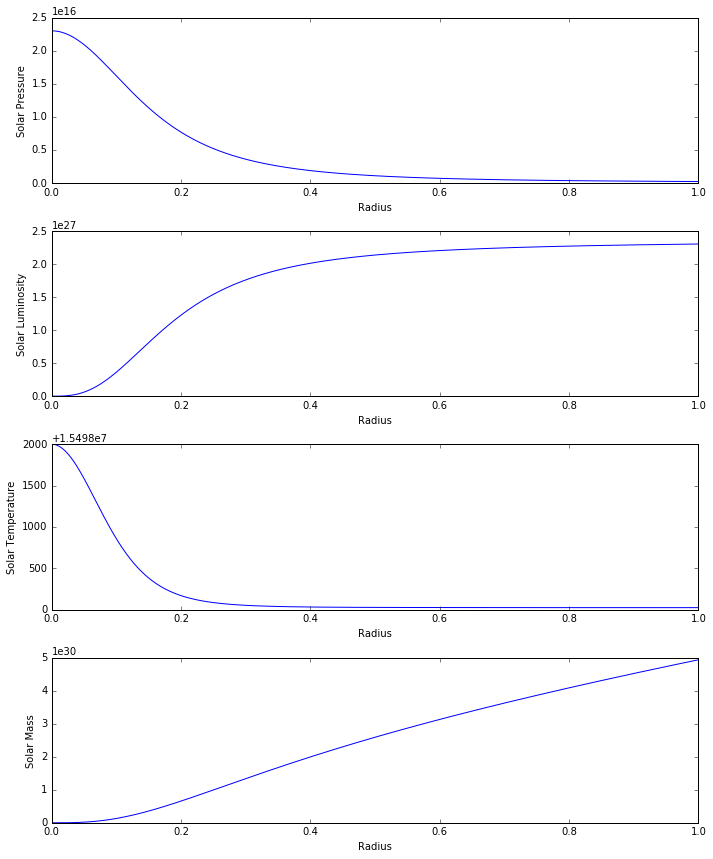

In [22]:
import scipy

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import odeint

from astropy import constants as constants

from astropy import units as units

%matplotlib inline


# Labeling Constants

pi=3.1415

X= 0.64

Y= 0.35

Z= 0.02

G = 6.67408E-11

Boltz= 1.38E-23

mu= 1.0/(2.0*X + (3.0/4.0)*Y + 0.5*Z)  #0.5-0.7

m_h= 1.67E-27

a=7.565E-16

P0= 2.3E16

L0=0.0

T0=15.5E6

M0=0.0

Rs= 6.95E8

t=10.0   #guillotine factor: number of electrons left in ion considered

c=3.0E8
                



def rho(y,r):
    
    P,L,T,M=y

    rho0 = (P - ((1.0/3.0)*(a)*np.power(T,4.0)))*(mu*m_h/(Boltz*T))
    
    return rho0


#for kappa

g1=1.8
g2=1.0
g3=10.0

def kappa(y, r):
    P, L, T, M=y
    
    k1=((4.3E21)*g1*Z*(1.0+X)*rho(y,r))/(t*np.power(T,3.5))   # mass obsorption coefficient for bound free absorption
    
    k2= (0.020)*(1.0+X)                               # scattering coefficient
    
    k3=((3.7E18)*g3*(1.0-Z)*(1.0+X)*rho(y,r))/(np.power(T,3.5)) # kramer's law for f-f opacity

    kappa0 = (k1 + k2 + k3)/(3.0)                      #average of the three kappas   

    # print kappa0
    return kappa0
        
    
#for epselon


def epsilon(y,r):
    
    
    P, L, T, M=y

    eps_pp0= 1.08E-12

    eps_cno0=8.24E-31

    x_h=0.64
    x_cno=0.015

   

    eps_pp= (eps_pp0)*(rho(y,r))*((np.power(x_h,2.0)))*(((T)/(1.0E6))**4.0)

   

    eps_cno= (eps_cno0)*(rho(y,r))*(x_h)*(x_cno)*(((T)/(1.0E6))**19.9)

    

    eps = eps_pp + eps_cno
    #print eps
    return eps
                       
    
    
    

# ODE 1

def dPdr(y,r):
                                 
    P, L, T, M=y

    dP_dr = -G*M*rho(y,r)/np.power(r,2.0)

    return dP_dr




#ODE 2


def dLdr(y,r):
       
    P, L, T, M=y
   
    dL_dr= 4.0*pi*(np.power(r,2.0))*(rho(y,r))*(epsilon(y,r))
       
    return dL_dr
       





# ODE 3
       
def dTdr(y,r):
           
    P, L, T, M=y
    
    dT_dr = -(3.0/(4.0*a*c))*(kappa(y,r)*rho(y,r)/np.power(T,3.5))*(L/(4.0*pi*np.power(r,2.0)))
    #dT_dr= ((-3.0)/(4.0*a*c))*(((kappa(y,r))*(rho(y,r)))/(np.power(T,3.0)))*(L/(4.0*pi*(np.power(r,2.0))))
    
    return dT_dr
       
    
    
# ODE 4

def dMdr(y, r):
    
    P, L, T, M=y

    dM_dr= 4.0*pi*(np.power(r,2.0))*(rho(y,r))

    return dM_dr   
                                      
                                   
#defining a function that will call all other functions                                   
       
def main(y, r): 
     
    P, L, T, M=y
    
    derivs=[ dPdr(y,r), dLdr(y,r), dTdr(y,r), dMdr(y,r)]

    #print derivs
    return derivs
                       
                                   
                                   
y0=[P0, L0, T0, M0]
                                   
                                   
                                   
#Radius array for solution

r = np.linspace(1.0, Rs, 1000)
                                   
#solution                                   
soln = odeint(main, y0, r)
                                   
#plotting
  
fig = plt.figure(1, figsize=(10,12))

#plotting M, P, T, L

ax1 = fig.add_subplot(411)
ax1.plot(r/Rs, soln[:,0])
ax1.set_xlabel('Radius')
ax1.set_ylabel('Solar Pressure')


ax2 = fig.add_subplot(412)
ax2.plot(r/Rs, soln[:,1])
ax2.set_xlabel('Radius')
ax2.set_ylabel('Solar Luminosity')

ax3 = fig.add_subplot(413)
ax3.plot(r/Rs, soln[:,2])
ax3.set_xlabel('Radius')
ax3.set_ylabel('Solar Temperature')
                                  
ax4 = fig.add_subplot(414)
ax4.plot(r/Rs, soln[:,3])
ax4.set_xlabel('Radius')
ax4.set_ylabel('Solar Mass')    

#ax5 = fig.add_subplot(315)
#ax5.plot(r/Rs, soln[])
#ax5.set_xlabel('Radius')
#ax5.set_ylabel('Solar Density')                                       

                                   
plt.tight_layout()
plt.show()
